In [123]:
import pandas as pd
import numpy as np
import networkx as nx
import os
from tqdm import tqdm

print(os.listdir())
import matplotlib.pyplot as plt

['social_graph_indicator.txt', '.DS_Store', 'social_A.txt', 'social_graph_labels.txt', 'social_to_adjacency.ipynb', 'social_node_labels.txt', 'large_twitch_edges.csv', 'social.txt', 'artist_edges.csv', '.ipynb_checkpoints', 'sampling_test.ipynb']


In [124]:
social_data = pd.read_csv("large_twitch_edges.csv")
print(social_data.shape)
np.savetxt(r'social_A.txt', social_data.values, fmt='%d', delimiter=",\t")

(6797557, 2)


In [125]:
G = nx.Graph()
for i in tqdm(range(social_data.shape[0])):
    G.add_edge(social_data.iloc[i, 0], social_data.iloc[i,1])
G = nx.convert_node_labels_to_integers(G)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6797557/6797557 [02:09<00:00, 52677.86it/s]


(6797557, 2)
168114
840


  0%|                                                                                                                                                                             | 0/200 [00:00<?, ?it/s]

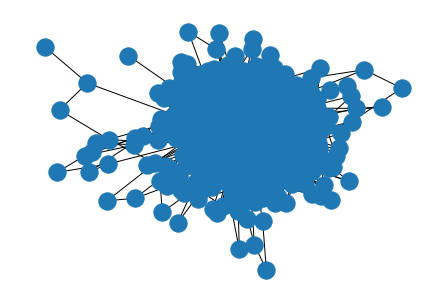

 25%|█████████████████████████████████████████                                                                                                                           | 50/200 [00:11<00:27,  5.48it/s]

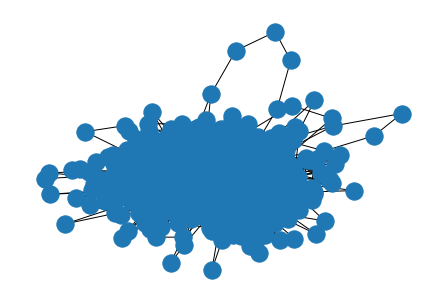

 50%|█████████████████████████████████████████████████████████████████████████████████▌                                                                                 | 100/200 [00:22<00:18,  5.32it/s]

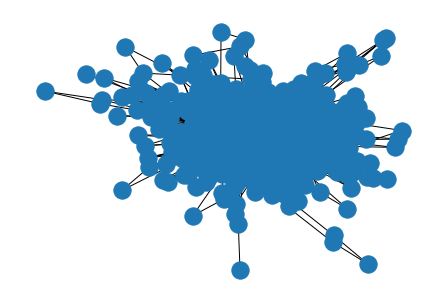

 75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                        | 150/200 [00:34<00:09,  5.35it/s]

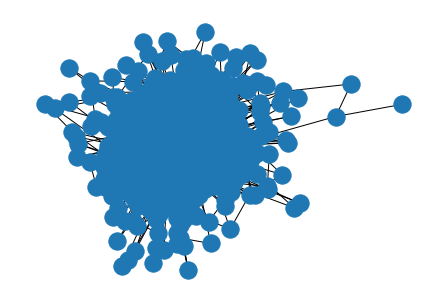

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:45<00:00,  4.38it/s]


(168114,)
(168114,)


In [129]:
from littleballoffur import ForestFireSampler, MetropolisHastingsRandomWalkSampler, RandomWalkSampler
print(social_data.shape)
n_nodes = np.unique(social_data.values).shape[0]
print(n_nodes)
n_graphs = 200

graph_ind_array = np.zeros(n_nodes)
n_per_graph = int(n_nodes / n_graphs)

print(n_per_graph)

total_n = n_per_graph * n_graphs


graph_ind_array = np.zeros(total_n)


#number_of_nodes = int(0.5*graph.number_of_nodes())


for i in tqdm(range(n_graphs)):
    
    offset_index = i * n_per_graph
    sampler = RandomWalkSampler(number_of_nodes = n_per_graph, seed = np.random.randint(1, 1e6))
    new_graph = sampler.sample(G)
    
    new_graph = nx.convert_node_labels_to_integers(new_graph, first_label=offset_index)
    
    graph_ind_array[offset_index:(i+1) * n_per_graph] = i+1
    
    
    if i ==0:
        graph_adj = np.array(new_graph.edges())
    else:
        graph_adj = np.append(graph_adj, np.array(new_graph.edges()), axis = 0)
    
    if i % 50 == 0:
        nx.draw(new_graph)
        plt.show()
        
np.savetxt(r'social_A.txt', graph_adj, fmt='%d', delimiter=",\t")
np.savetxt(r'social_graph_indicator.txt',graph_ind_array, fmt="%d")

np.savetxt(r'social_node_labels.txt', np.arange(1, total_n+1), fmt = "%d")
print(np.arange(1, n_nodes+1).shape)

np.savetxt(r'social_graph_labels.txt', np.ones(total_n), fmt = "%d")
print(np.ones(n_nodes).shape)

In [ ]:
# print(social_data.shape)
# n_nodes = np.unique(social_data.values).shape[0]
# print(n_nodes)
# n_graphs = 100

# graph_ind_array = np.zeros(n_nodes)
# n_per_graph = int(n_nodes / n_graphs)

# print(n_per_graph)

# G_ids = []

# for i in range(n_graphs):
    
#     G2 = nx.Graph()

#     for node in G.nodes():
        
#         neighbours = list(G.neighbors(node))


In [12]:


# for i in range(n_graphs):
    
#     graph_ind_array[i*n_per_graph : (i+1)*n_per_graph] = i+1
    
#     if i == n_graphs - 1:
#         graph_ind_array[(i+1)*n_per_graph:] = i+1

np.savetxt(r'social_graph_indicator.txt',graph_ind_array, fmt="%d")
print(graph_ind_array.shape)

(6797557, 2)
168114
1681
(168114,)


In [13]:
np.savetxt(r'social_node_labels.txt', np.arange(1, n_nodes+1), fmt = "%d")
print(np.arange(1, n_nodes+1).shape)

(168114,)


In [14]:
np.savetxt(r'social_graph_labels.txt', np.ones(n_nodes), fmt = "%d")
print(np.ones(n_nodes).shape)

(168114,)


In [6]:
# adj = pd.read_csv("/Users/alexdavies/Documents/Year_1/Project/GRAN_social/data/DD/DD_A.txt", delimiter = ",|\n")
# adj.shape

In [7]:
# g_ind = pd.read_csv("/Users/alexdavies/Documents/Year_1/Project/GRAN_social/data/DD/DD_graph_indicator.txt", delimiter = ",|\n")
# g_ind.shape

In [8]:
# n_lab = pd.read_csv("/Users/alexdavies/Documents/Year_1/Project/GRAN_social/data/DD/DD_node_labels.txt", delimiter = ",|\n")
# n_lab.shape

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.2/75.2 MB 13.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.6/204.6 KB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 11.8 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... -^C
anceled
ERROR: Operation cancelled by user
